In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51167 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51167 non-null  object 
 1   online_order                 51167 non-null  object 
 2   book_table                   51167 non-null  object 
 3   rate                         51167 non-null  float64
 4   votes                        51167 non-null  int64  
 5   location                     51167 non-null  object 
 6   rest_type                    51167 non-null  object 
 7   dish_liked                   51167 non-null  object 
 8   cuisines                     51167 non-null  object 
 9   approx_cost(for two people)  51167 non-null  int64  
 10  listed_in(type)              51167 non-null  object 
 11  listed_in(city)              51167 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 5.1+ MB


In [19]:
#df.drop_duplicates(inplace = True)
df.shape

(51167, 12)

In [5]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [8]:
def handleRate(value):
    if(value=='NEW' or value=='-'):
        return np.nan                      # replace 'NEW' and '-' with Null value using np.nan
    else:
        value=str(value).split('/')
        value=value[0];
        return float(value)
df['rate']=df['rate'].apply(handleRate)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [18]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [10]:
df['rate'] = df['rate'].fillna(method='ffill')

C:\Users\HP\AppData\Local\Temp\ipykernel_14604\2000738507.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['rate'] = df['rate'].fillna(method='ffill')


In [12]:
# Drop some columns
df = df.drop(['url', 'address', 'phone', 'menu_item', 'reviews_list'], axis = 1)

In [15]:
#Replace missing values in 'dish_liked' with 'Unable to Decide'
df['dish_liked'] = df['dish_liked'].fillna('Unable to Decide')

# Replace 'approx_cost(for two people)' missing values with the mean
#df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].mean())

# Replace missing values in 'cuisines' with 'Not Specified'
df['cuisines'] = df['cuisines'].fillna('Not Specified')
df['location'].fillna(df['location'].mode()[0], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14604\1068930286.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location'].fillna(df['location'].mode()[0], inplace=True)


In [17]:
df.dropna(inplace = True)

In [23]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype('float')

In [21]:
df['approx_cost(for two people)'] = (
    pd.to_numeric(df['approx_cost(for two people)'].str.replace(',', ''), errors='coerce')
)

Text(0.5, 0, 'Type of restaurant')

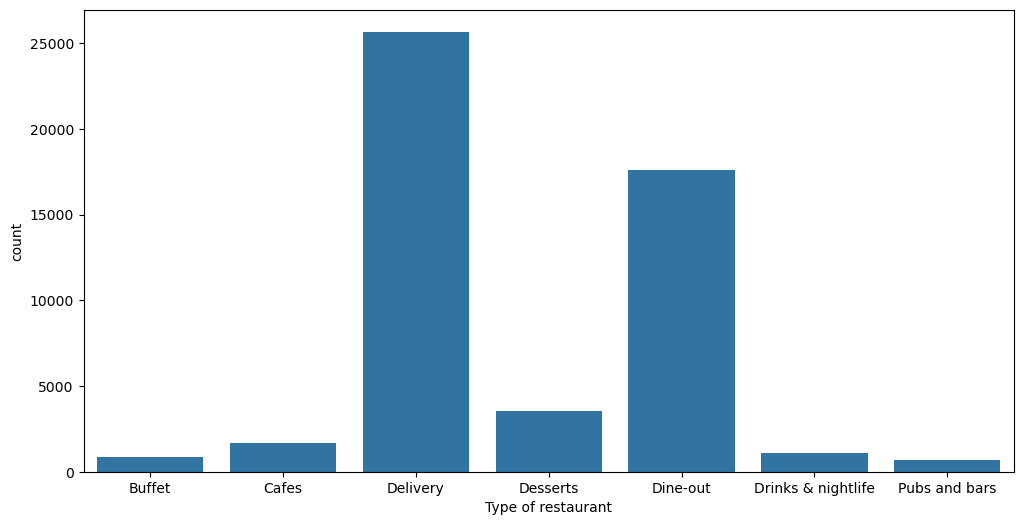

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(data = df, x='listed_in(type)')
plt.xlabel("Type of restaurant")

Text(0, 0.5, 'Votes')

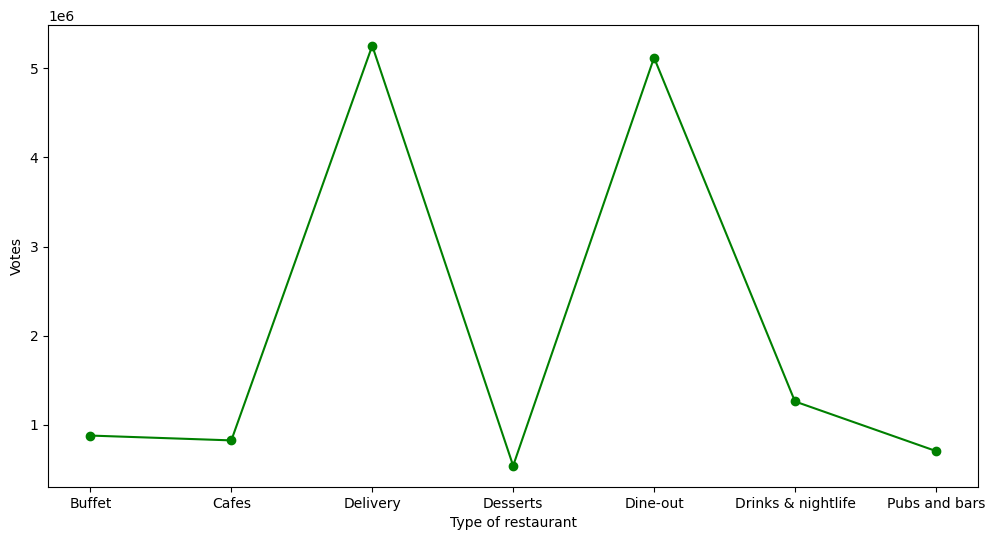

In [28]:
plt.figure(figsize=(12,6))
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')

In [30]:
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']
print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
49170    Byg Brewski Brewing Company
49627    Byg Brewski Brewing Company
50059    Byg Brewski Brewing Company
Name: name, dtype: object


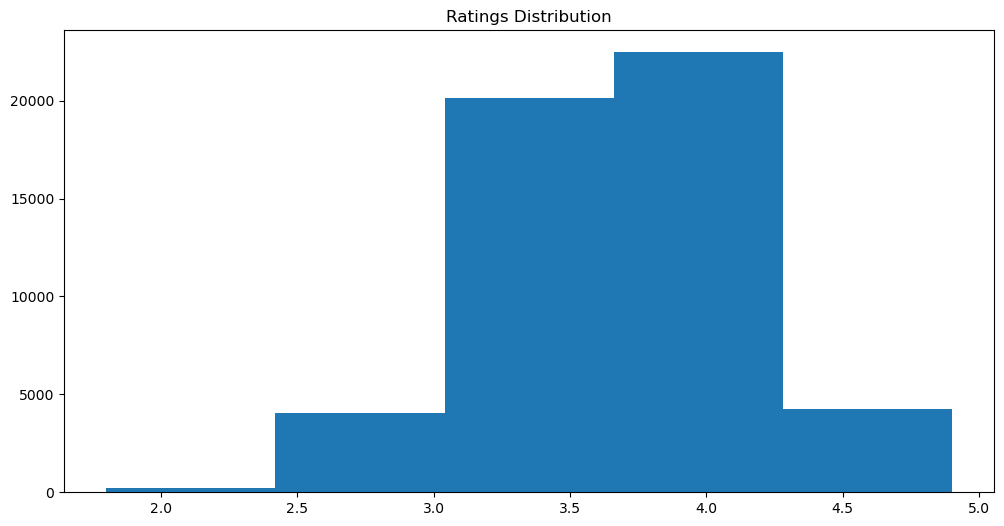

In [31]:
plt.figure(figsize=(12,6))
plt.hist(df['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14604\1770690977.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x='online_order', palette = 'plasma')


<Axes: xlabel='online_order', ylabel='count'>

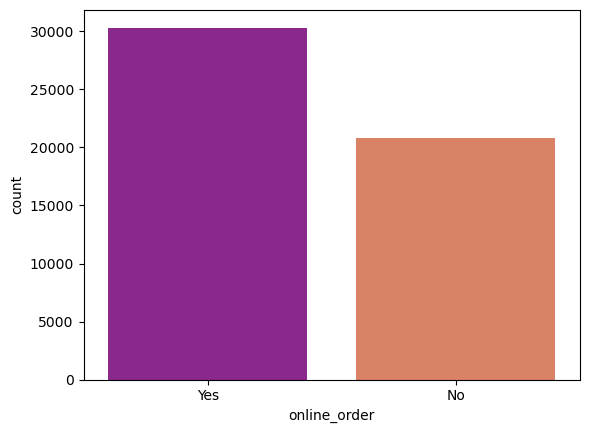

In [34]:
sns.countplot(data = df, x='online_order', palette = 'plasma')

<Axes: xlabel='online_order', ylabel='rate'>

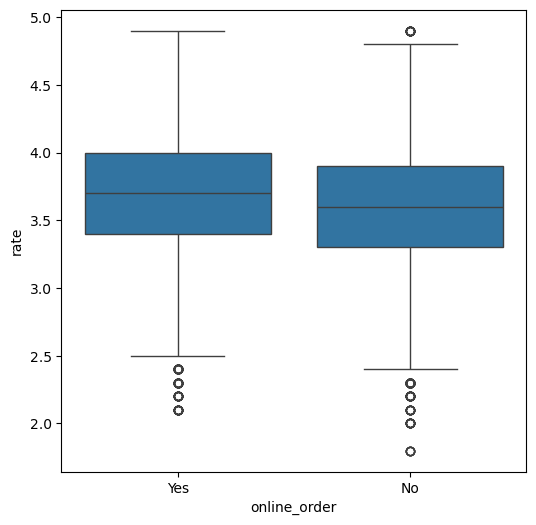

In [37]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

([0, 1], [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

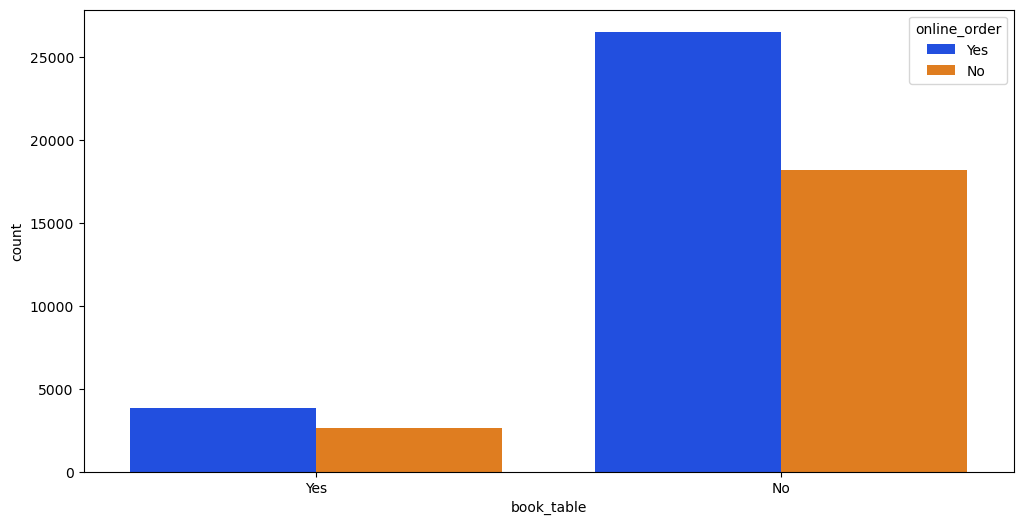

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(x='book_table', data=df, hue='online_order', palette='bright')
plt.xticks(rotation=360)

In [46]:
#df.groupby(['location','online_order']).count()
df_gptest1 = df[['location','online_order','name']]
grouped_test1 = df_gptest1.groupby(['location','online_order'],as_index=False).count()
grouped_test1

,location,online_order,name
0,BTM,No,1766
1,BTM,Yes,3305
2,Banashankari,No,397
3,Banashankari,Yes,509
4,Banaswadi,No,302
...,...,...,...
176,Wilson Garden,No,112
177,Wilson Garden,Yes,134
178,Yelahanka,Yes,5
179,Yeshwantpur,No,26


In [40]:
df.groupby(['location','online_order'])['name'].count()

location       online_order
BTM            No              1766
               Yes             3305
Banashankari   No               397
               Yes              509
Banaswadi      No               302
                               ... 
Wilson Garden  No               112
               Yes              134
Yelahanka      Yes                5
Yeshwantpur    No                26
               Yes               93
Name: name, Length: 181, dtype: int64

In [47]:
df.groupby(['location','book_table'])['name'].count()

location       book_table
BTM            No            4903
               Yes            168
Banashankari   No             842
               Yes             64
Banaswadi      No             637
                             ... 
Wilson Garden  No             241
               Yes              5
Yelahanka      No               5
Yeshwantpur    No             117
               Yes              2
Name: name, Length: 159, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_14604\2277729841.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'listed_in(type)', y = 'rate', palette = 'plasma')


<Axes: xlabel='listed_in(type)', ylabel='rate'>

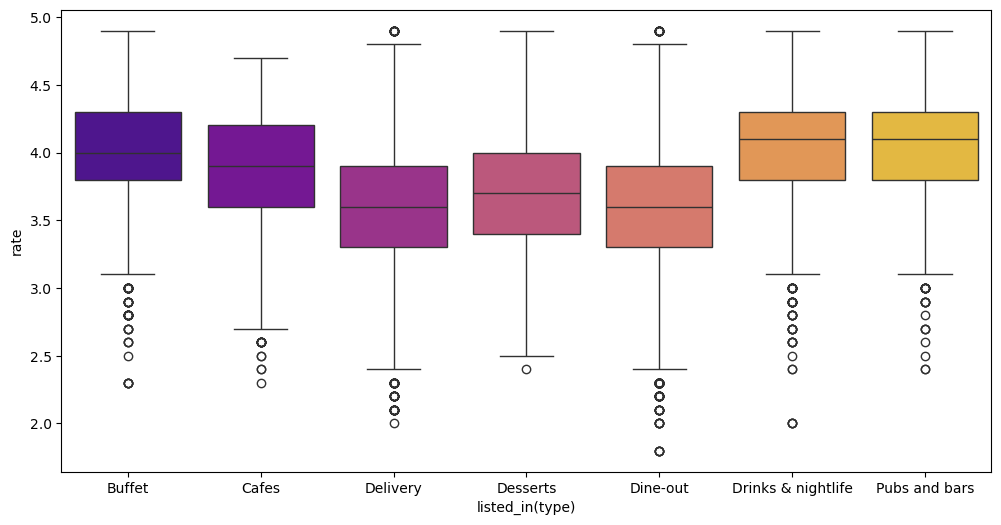

In [49]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df, x = 'listed_in(type)', y = 'rate', palette = 'plasma')

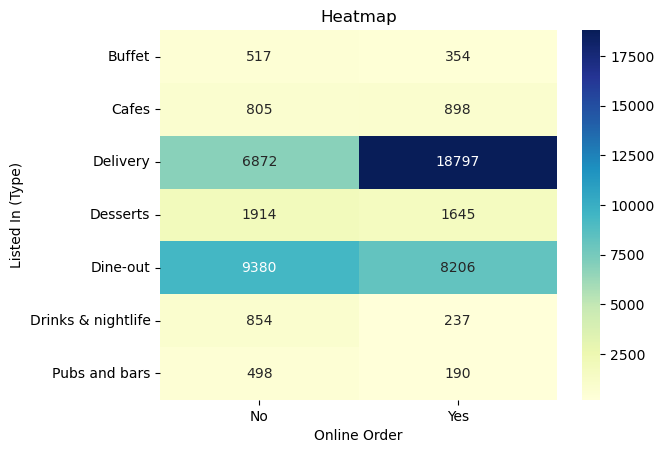

In [52]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()